In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
f1=pd.read_csv("train.csv")

In [3]:
f1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
f1.shape

(768, 9)

In [5]:
f1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
f1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
f1['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [8]:
x=f1.drop(columns='Outcome')
y=f1['Outcome']

In [9]:
x.shape

(768, 8)

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# Decision tree classifier

In [11]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred =dt_model.predict(x_test)

In [13]:
accuracy_score(y_test,y_pred)

0.7272727272727273

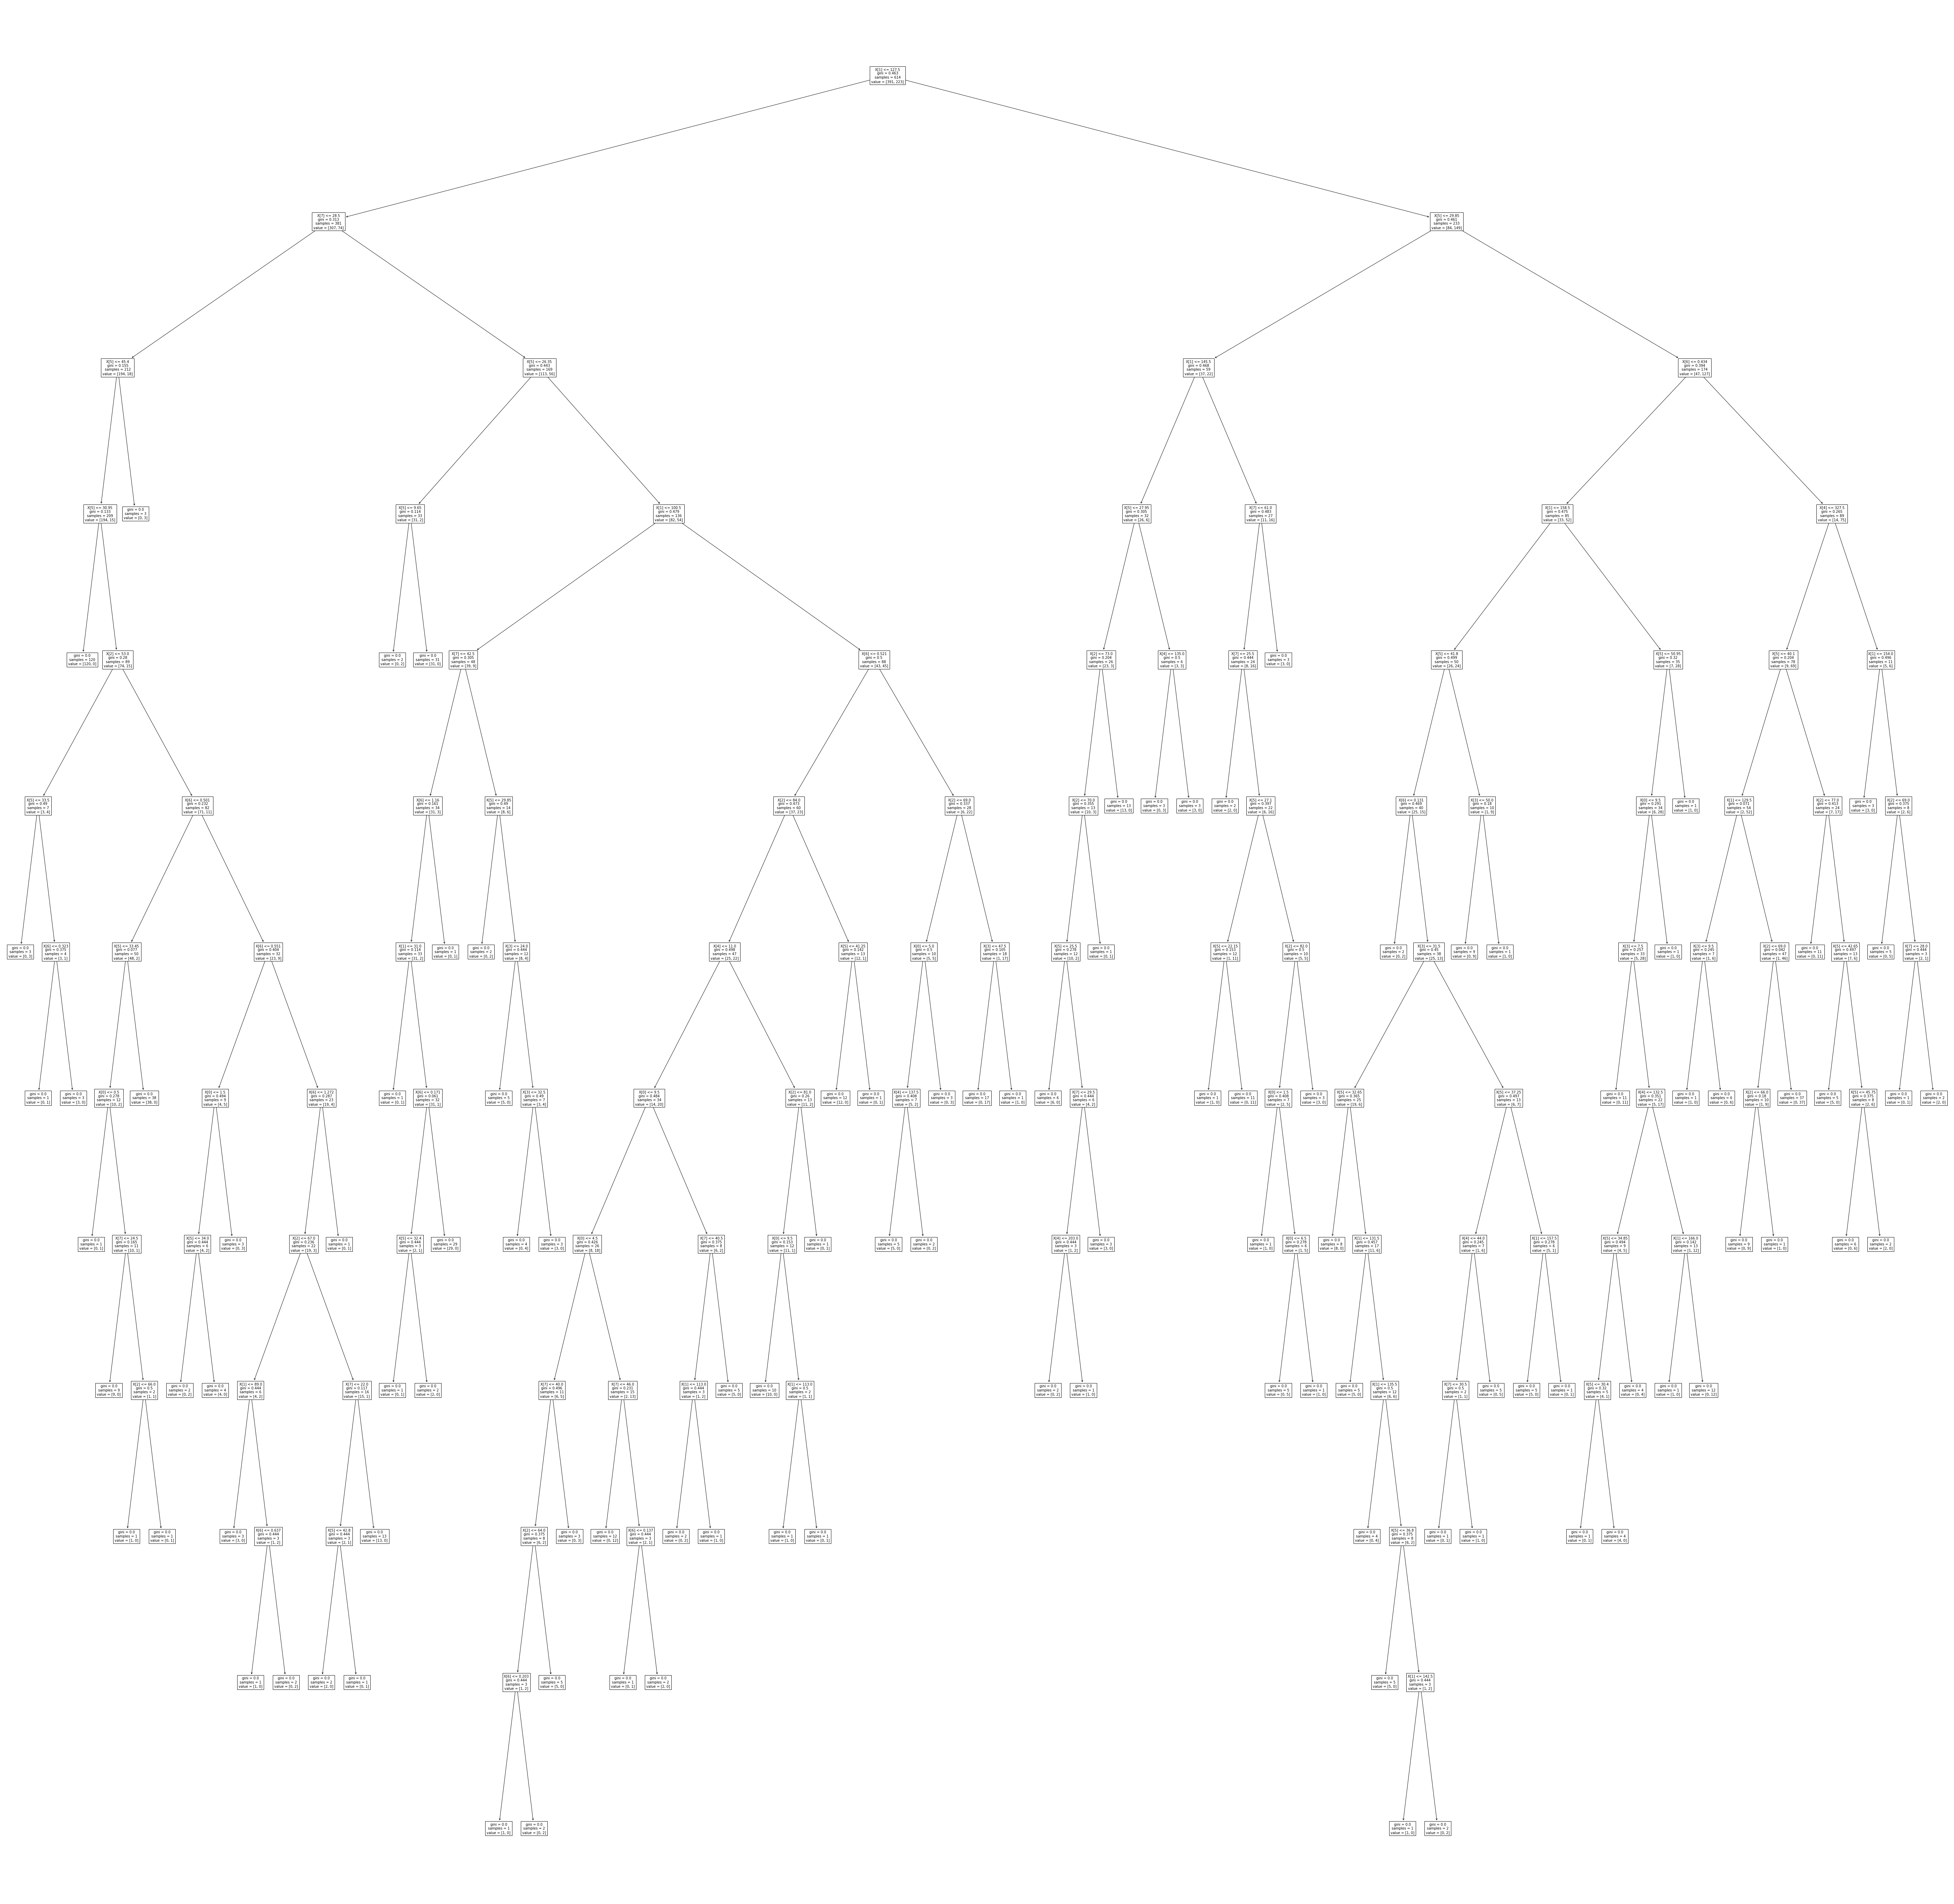

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(100,100))
tree.plot_tree(dt_model)
plt.show()
plt.savefig('output.png', dpi=300, bbox_inches='tight')

# Random_forest classifier

# Grid search cv method

In [28]:
parameters={
    'n_estimators':[100,200,500,700]
}

In [29]:
rf_gridcv=GridSearchCV(RandomForestClassifier(),param_grid=parameters,cv=5)
rf_gridcv.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 200, 500, 700]})

In [30]:
rf_gridcv.best_params_

{'n_estimators': 500}

In [31]:
rf_model=RandomForestClassifier(n_estimators=500)
rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [32]:
y_pred=rf_model.predict(x_test)

In [33]:
accuracy_score(y_test,y_pred)

0.7532467532467533

# Function to find CROSS SCORE of diff models

In [24]:
model=[SVC(kernel='rbf'),LogisticRegression(max_iter=1000),KNeighborsClassifier(),dt_model,rf_model]

In [25]:
def model_cross_score(model):
    for i in model:
        model_score=cross_val_score(i,x,y,cv=5)
        avg=sum(model_score)/len(model_score)
        print("AVG CROSS VAL SCORE FOR THE MODEL ",i," is : ",avg)
    

In [26]:
model_cross_score(model)

AVG CROSS VAL SCORE FOR THE MODEL  SVC()  is :  0.7591460826754943
AVG CROSS VAL SCORE FOR THE MODEL  LogisticRegression(max_iter=1000)  is :  0.7721925133689839
AVG CROSS VAL SCORE FOR THE MODEL  KNeighborsClassifier()  is :  0.723979288685171
AVG CROSS VAL SCORE FOR THE MODEL  DecisionTreeClassifier()  is :  0.7097529921059332
AVG CROSS VAL SCORE FOR THE MODEL  RandomForestClassifier()  is :  0.7839062897886427
